In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


df = pd.read_csv('sales_data_sample.csv',encoding='utf-8', encoding_errors='ignore')

df.head(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium



Pivot Table:
                      sum         mean       count
             Total_Spent  Total_Spent Total_Spent
CITY                                             
Aaarhus         77478.79  2869.584815          27
Allentown       96378.27  3108.976452          31
Barcelona       73927.00  3214.217391          23
Bergamo        127143.64  2648.825833          48
Bergen          86339.11  2977.210690          29
...                  ...          ...         ...
Toulouse        58885.28  2944.264000          20
Tsawassen       71492.33  2749.705000          26
Vancouver       60597.91  2754.450455          22
Versailles      53364.97  2964.720556          18
White Plains    73650.48  2832.710769          26

[73 rows x 3 columns]

Descriptive statistics:
 count    2823.000000
mean     2936.906408
std      1105.644284
min       482.130000
25%      2100.000000
50%      2800.000000
75%      3726.810000
max      9048.160000
Name: Total_Spent, dtype: float64


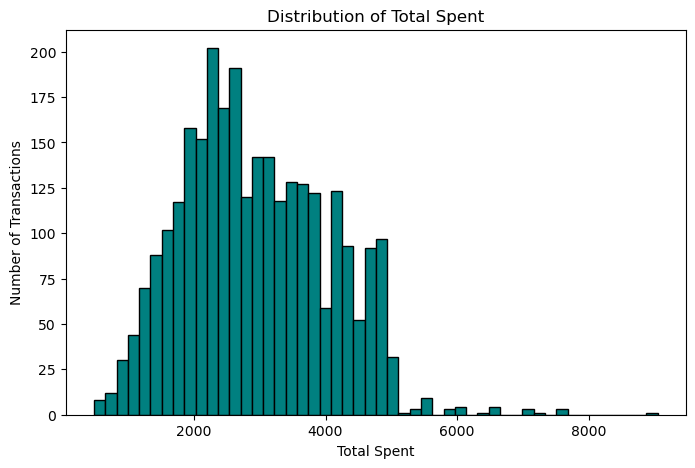


T-test between NYC and Reims: t-stat=0.67, p-value=0.508


In [22]:
# Add calculated columns as needed
df['Total_Spent'] = df['PRICEEACH'] * df['QUANTITYORDERED']

# 1. Pivot Table: Summarize total sales and average order per region
pivot = df.pivot_table(index='CITY', values='Total_Spent', aggfunc=['sum', 'mean', 'count'])
print("\nPivot Table:\n", pivot)

# 2. Descriptive statistics
desc_stats = df['Total_Spent'].describe()
print("\nDescriptive statistics:\n", desc_stats)

# 3. Data distribution plot: Histogram
plt.figure(figsize=(8,5))
plt.hist(df['Total_Spent'], bins=50, color='teal', edgecolor='black')
plt.title("Distribution of Total Spent")
plt.xlabel("Total Spent")
plt.ylabel("Number of Transactions")
plt.show()

# 4. Correlation analysis (if dataset includes Marketing_Spend)
if 'Marketing_Spend' in df.columns:
    corr = df[['Total_Spent', 'Marketing_Spend']].corr()
    print("\nCorrelation matrix:\n", corr)

# 5. Hypothesis test: Compare average total spent between two regions
regions = df['CITY'].unique()
region1 = df[df['CITY'] == regions[0]]['Total_Spent']
region2 = df[df['CITY'] == regions[1]]['Total_Spent']
t_stat, p_value = stats.ttest_ind(region1, region2, equal_var=False)
print(f"\nT-test between {regions[0]} and {regions[1]}: t-stat={t_stat:.2f}, p-value={p_value:.3f}")
